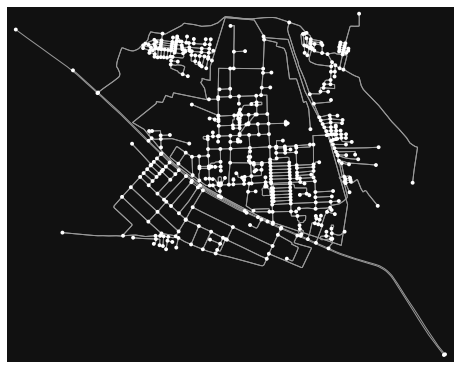

In [4]:
import osmnx as ox
import numpy as np


mapnit = ox.graph_from_xml('/home/farhan/catkin_ws/autonomous-delivery-robot/Planning/Vnit_map/shortenednitmap.osm', simplify = True)

fig, ax = ox.plot_graph(mapnit)

In [6]:
G = ox.graph.graph_from_place('National Institute of Technology Trichy')
len(list(G.nodes()))


229

In [7]:
pip install geopy


     |████████████████████████████████| 118 kB 1.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [58]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="name-of-your-user-agent")
location_variable = geolocator.geocode("Barn Hall",limit=10,exactly_one=False)
print((location_variable))




[Location(Barn Hall (T)M0058 2352G, Old Heath, Colchester, Essex, England, United Kingdom, (51.8742073, 0.9123875818068693, 0.0)), Location(Barn Hall, Ad Block Road, Bhel Nagar, Thiruverumbur, Tiruchirappalli District, Tamil Nadu, 620015, India, (10.7593441, 78.81323519840132, 0.0))]


In [51]:
import geopy
from geopy.geocoders import Nominatim

p = geopy.point.Point(10.761085000000001, 78.81892532464241)

r = Nominatim(user_agent="name-of-your-user-agent").reverse(p)

print(r)

National Institute of Technology Trichy, 13th Street, Thiruverumbur, Tiruchirappalli District, Tamil Nadu, 620015, India


In [11]:
import pandas as pd
data = pd.read_csv('/home/farhan/catkin_ws/autonomous-delivery-robot/Planning/Mission Planning/Locations.csv')
print(data)


    Latitude  Longitude           Name
0  10.759661  78.810809          ORION
1  10.759344  78.813235      Barn Hall
2  10.756110  78.815570            CCD
3  10.762289  78.814226  Hostel Office
4  10.761085  78.818925      2K Market


In [12]:
import folium
locations= pd.read_csv('/home/farhan/catkin_ws/autonomous-delivery-robot/Planning/Mission Planning/Locations.csv')
locations = locations[["Latitude", "Longitude", "Name"]]

map = folium.Map(location=[locations.Latitude.mean(), locations.Longitude.mean()], zoom_start=14, control_scale=True)
map

In [13]:
for index, location_info in locations.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(map)
    
map


In [86]:
locations= pd.read_csv('/home/farhan/catkin_ws/autonomous-delivery-robot/Planning/Mission Planning/Locations.csv')
locations = locations[["Latitude", "Longitude", "Name"]]

pts_coordinates=[]
for index, location_info in locations.iterrows():
    l=tuple([location_info['Latitude'],location_info['Longitude']])
    pts_coordinates.append(l)
    
   
 


In [91]:
 = pts_coordinates[0:3] 

import folium
map = folium.Map((pts_coordinates[0][1],pts_coordinates[0][0]), zoom_start=13)
for pt in pts_coordinates:
    marker = folium.Marker([pt[1], pt[0]]) #latitude,longitude
    map.add_child(marker) 
map


In [101]:
import osmnx as ox
# change to latitude, longitude order
itin = [(pt[1],pt[0]) for i in pts_coordinates] #latitude longitude
# create graph

G = ox.graph.graph_from_point(itin[0],network_type='drive')
# # create the path


EmptyOverpassResponse: There are no data elements in the response JSON